In [19]:
# Load QM8 (Quantum Machine 8) Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the QM8 dataset
print("Loading QM8 dataset...")
df = pd.read_csv('qm8.csv')

print(f"\nDataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nFirst few rows:")
print(df.head())
print(f"\nDataset Info:")
print(df.info())
print(f"\nBasic Statistics:")
print(df.describe())


Loading QM8 dataset...

Dataset loaded successfully!
Shape: (21786, 17)

Column names:
['smiles', 'E1-CC2', 'E2-CC2', 'f1-CC2', 'f2-CC2', 'E1-PBE0', 'E2-PBE0', 'f1-PBE0', 'f2-PBE0', 'E1-PBE0.1', 'E2-PBE0.1', 'f1-PBE0.1', 'f2-PBE0.1', 'E1-CAM', 'E2-CAM', 'f1-CAM', 'f2-CAM']

First few rows:
              smiles    E1-CC2    E2-CC2    f1-CC2    f2-CC2   E1-PBE0  \
0  [H]C([H])([H])[H]  0.432952  0.432960  0.249728  0.249736  0.430218   
1       [H]N([H])[H]  0.265220  0.350081  0.067015  0.030049  0.268386   
2            [H]O[H]  0.286537  0.363579  0.037755  0.000000  0.291377   
3          [H]C#C[H]  0.358629  0.358629  0.000000  0.000000  0.256321   
4             [H]C#N  0.319958  0.336074  0.000000  0.000000  0.295139   

    E2-PBE0   f1-PBE0       f2-PBE0  E1-PBE0.1  E2-PBE0.1  f1-PBE0.1  \
0  0.430236  0.181436  1.815015e-01   0.430218   0.430236   0.181436   
1  0.349106  0.040761  3.164115e-02   0.268386   0.349106   0.040761   
2  0.362091  0.019503  1.000000e-08   0.291377  

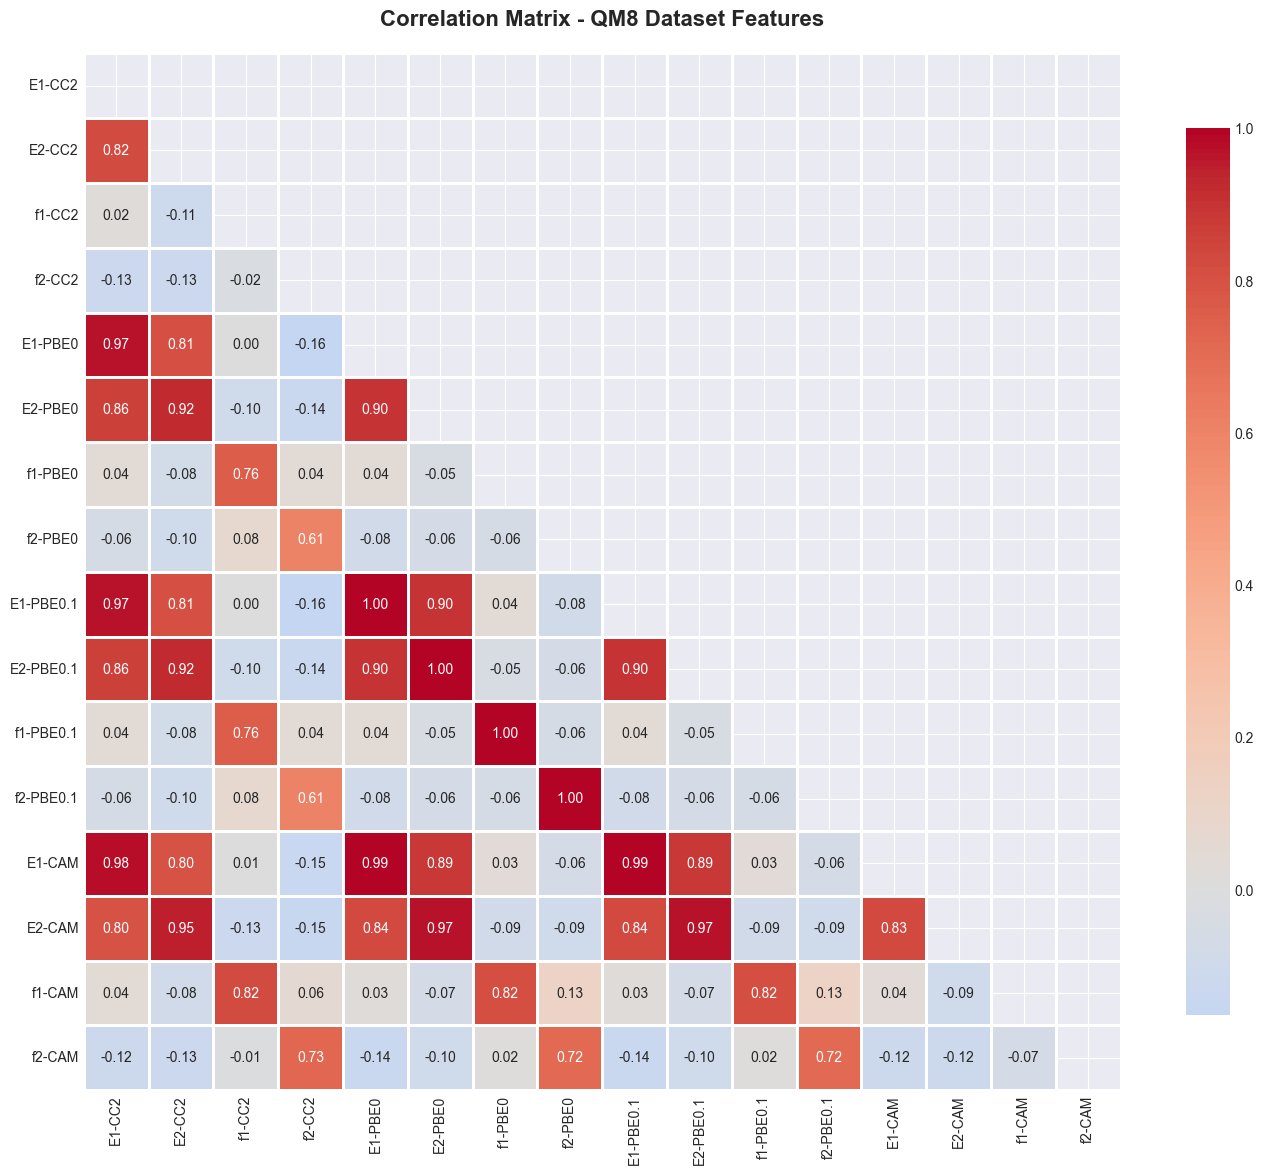

In [20]:
# Visualization 2: Correlation Heatmap for all numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - QM8 Dataset Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


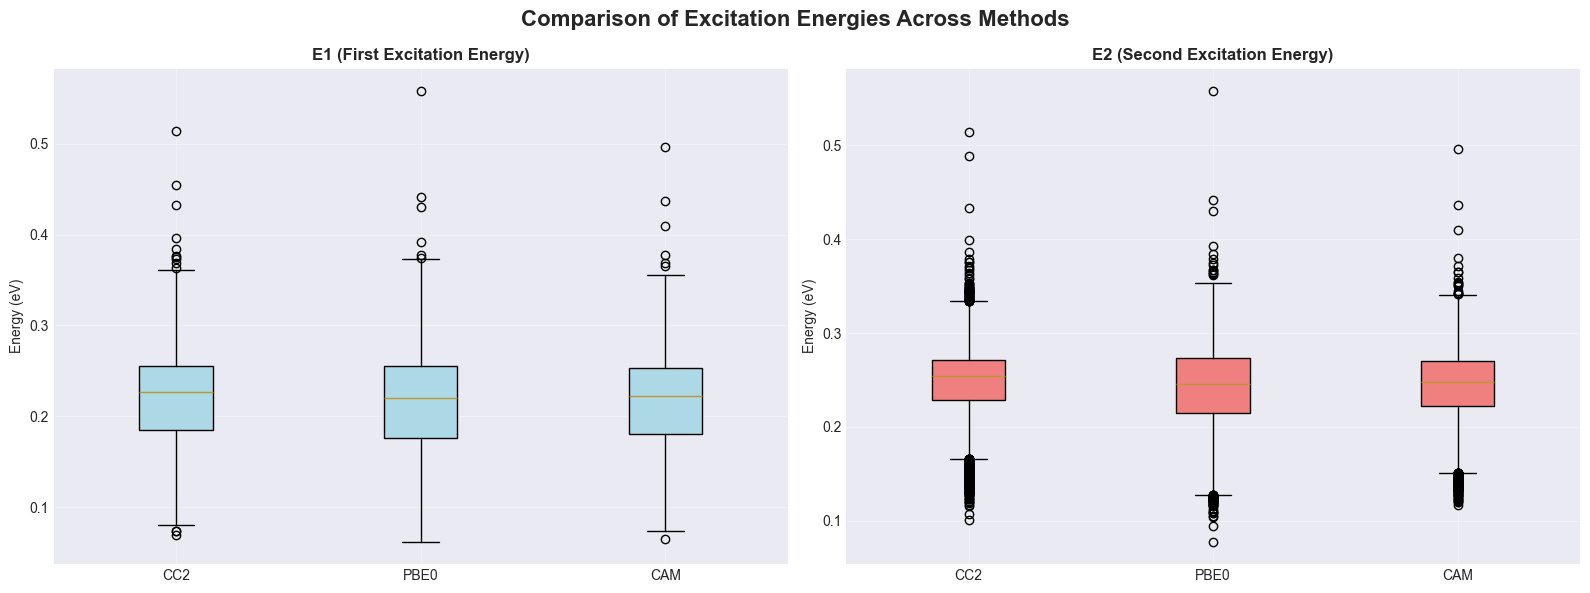

In [21]:
# Visualization 3: Box plots comparing methods for E1 and E2
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Comparison of Excitation Energies Across Methods', fontsize=16, fontweight='bold')

# Prepare data for box plots
e1_data = [df[f'E1-{method}'].dropna() for method in ['CC2', 'PBE0', 'CAM'] if f'E1-{method}' in df.columns]
e2_data = [df[f'E2-{method}'].dropna() for method in ['CC2', 'PBE0', 'CAM'] if f'E2-{method}' in df.columns]
method_labels = [method for method in ['CC2', 'PBE0', 'CAM'] if f'E1-{method}' in df.columns]

# E1 box plot
bp1 = axes[0].boxplot(e1_data, labels=method_labels, patch_artist=True)
for patch in bp1['boxes']:
    patch.set_facecolor('lightblue')
axes[0].set_title('E1 (First Excitation Energy)', fontweight='bold')
axes[0].set_ylabel('Energy (eV)')
axes[0].grid(True, alpha=0.3)

# E2 box plot
bp2 = axes[1].boxplot(e2_data, labels=method_labels, patch_artist=True)
for patch in bp2['boxes']:
    patch.set_facecolor('lightcoral')
axes[1].set_title('E2 (Second Excitation Energy)', fontweight='bold')
axes[1].set_ylabel('Energy (eV)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


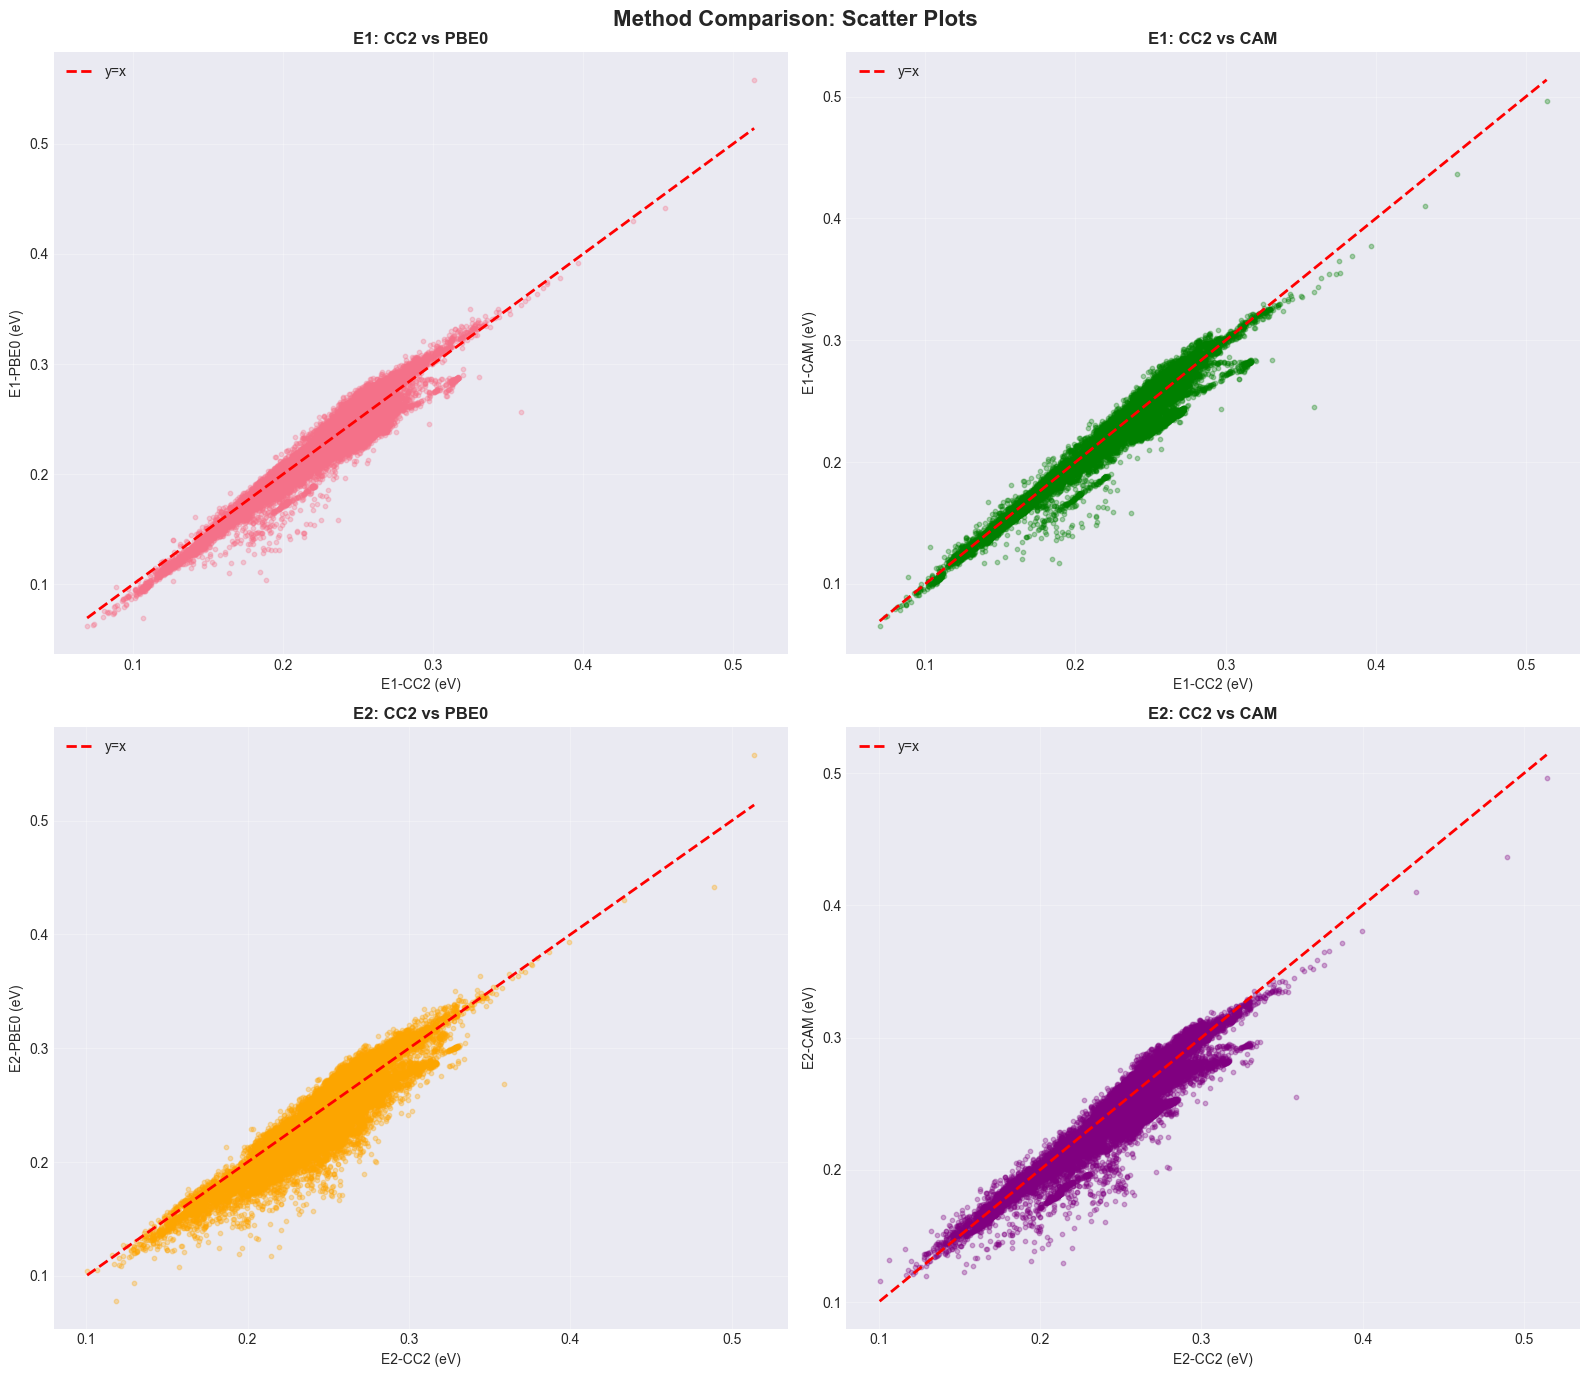

In [22]:
# Visualization 4: Scatter plots comparing methods (CC2 vs PBE0 vs CAM)
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Method Comparison: Scatter Plots', fontsize=16, fontweight='bold')

# E1: CC2 vs PBE0
if 'E1-CC2' in df.columns and 'E1-PBE0' in df.columns:
    axes[0, 0].scatter(df['E1-CC2'], df['E1-PBE0'], alpha=0.3, s=10)
    axes[0, 0].plot([df['E1-CC2'].min(), df['E1-CC2'].max()], 
                    [df['E1-CC2'].min(), df['E1-CC2'].max()], 'r--', lw=2, label='y=x')
    axes[0, 0].set_xlabel('E1-CC2 (eV)')
    axes[0, 0].set_ylabel('E1-PBE0 (eV)')
    axes[0, 0].set_title('E1: CC2 vs PBE0', fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

# E1: CC2 vs CAM
if 'E1-CC2' in df.columns and 'E1-CAM' in df.columns:
    axes[0, 1].scatter(df['E1-CC2'], df['E1-CAM'], alpha=0.3, s=10, color='green')
    axes[0, 1].plot([df['E1-CC2'].min(), df['E1-CC2'].max()], 
                    [df['E1-CC2'].min(), df['E1-CC2'].max()], 'r--', lw=2, label='y=x')
    axes[0, 1].set_xlabel('E1-CC2 (eV)')
    axes[0, 1].set_ylabel('E1-CAM (eV)')
    axes[0, 1].set_title('E1: CC2 vs CAM', fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

# E2: CC2 vs PBE0
if 'E2-CC2' in df.columns and 'E2-PBE0' in df.columns:
    axes[1, 0].scatter(df['E2-CC2'], df['E2-PBE0'], alpha=0.3, s=10, color='orange')
    axes[1, 0].plot([df['E2-CC2'].min(), df['E2-CC2'].max()], 
                    [df['E2-CC2'].min(), df['E2-CC2'].max()], 'r--', lw=2, label='y=x')
    axes[1, 0].set_xlabel('E2-CC2 (eV)')
    axes[1, 0].set_ylabel('E2-PBE0 (eV)')
    axes[1, 0].set_title('E2: CC2 vs PBE0', fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# E2: CC2 vs CAM
if 'E2-CC2' in df.columns and 'E2-CAM' in df.columns:
    axes[1, 1].scatter(df['E2-CC2'], df['E2-CAM'], alpha=0.3, s=10, color='purple')
    axes[1, 1].plot([df['E2-CC2'].min(), df['E2-CC2'].max()], 
                    [df['E2-CC2'].min(), df['E2-CC2'].max()], 'r--', lw=2, label='y=x')
    axes[1, 1].set_xlabel('E2-CC2 (eV)')
    axes[1, 1].set_ylabel('E2-CAM (eV)')
    axes[1, 1].set_title('E2: CC2 vs CAM', fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


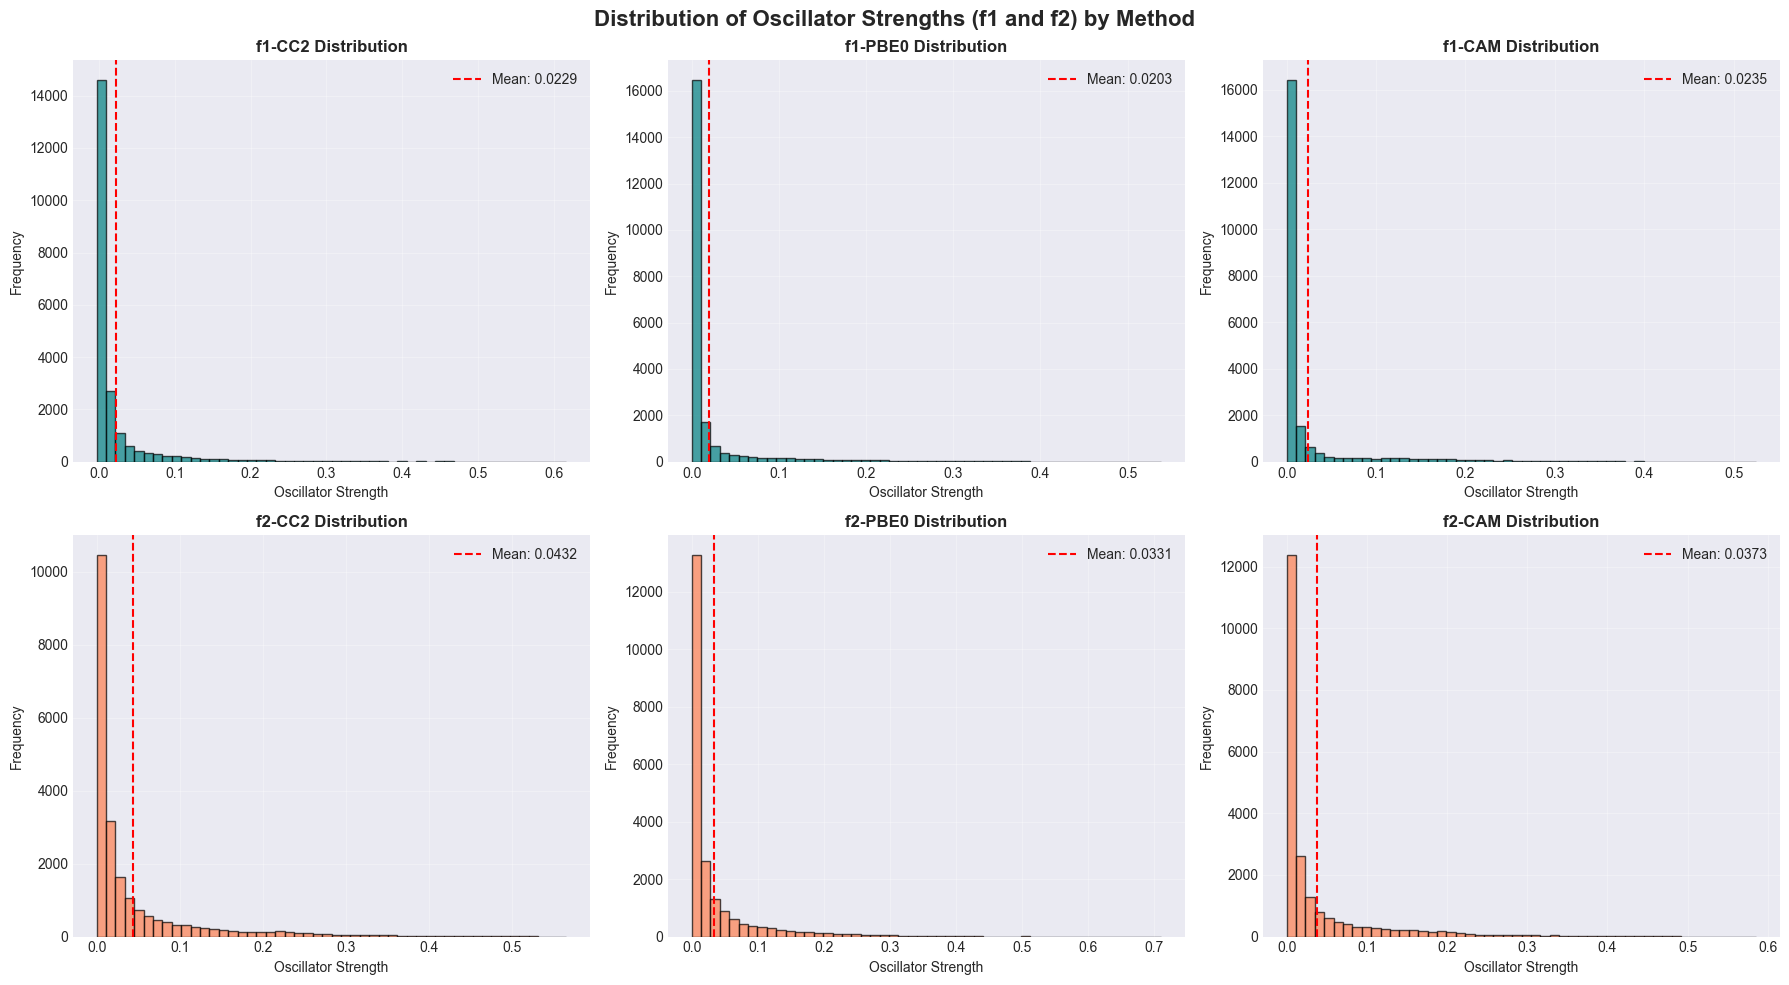

In [23]:
# Visualization 5: Distribution of Oscillator Strengths (f1 and f2)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Oscillator Strengths (f1 and f2) by Method', fontsize=16, fontweight='bold')

methods = ['CC2', 'PBE0', 'CAM']
for idx, method in enumerate(methods):
    # f1 distribution
    col_f1 = f'f1-{method}'
    if col_f1 in df.columns:
        data_f1 = df[col_f1].dropna()
        axes[0, idx].hist(data_f1, bins=50, alpha=0.7, edgecolor='black', color='teal')
        axes[0, idx].set_title(f'f1-{method} Distribution', fontweight='bold')
        axes[0, idx].set_xlabel('Oscillator Strength')
        axes[0, idx].set_ylabel('Frequency')
        axes[0, idx].axvline(data_f1.mean(), color='red', linestyle='--', 
                            label=f'Mean: {data_f1.mean():.4f}')
        axes[0, idx].legend()
        axes[0, idx].grid(True, alpha=0.3)
    
    # f2 distribution
    col_f2 = f'f2-{method}'
    if col_f2 in df.columns:
        data_f2 = df[col_f2].dropna()
        axes[1, idx].hist(data_f2, bins=50, alpha=0.7, edgecolor='black', color='coral')
        axes[1, idx].set_title(f'f2-{method} Distribution', fontweight='bold')
        axes[1, idx].set_xlabel('Oscillator Strength')
        axes[1, idx].set_ylabel('Frequency')
        axes[1, idx].axvline(data_f2.mean(), color='red', linestyle='--', 
                            label=f'Mean: {data_f2.mean():.4f}')
        axes[1, idx].legend()
        axes[1, idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


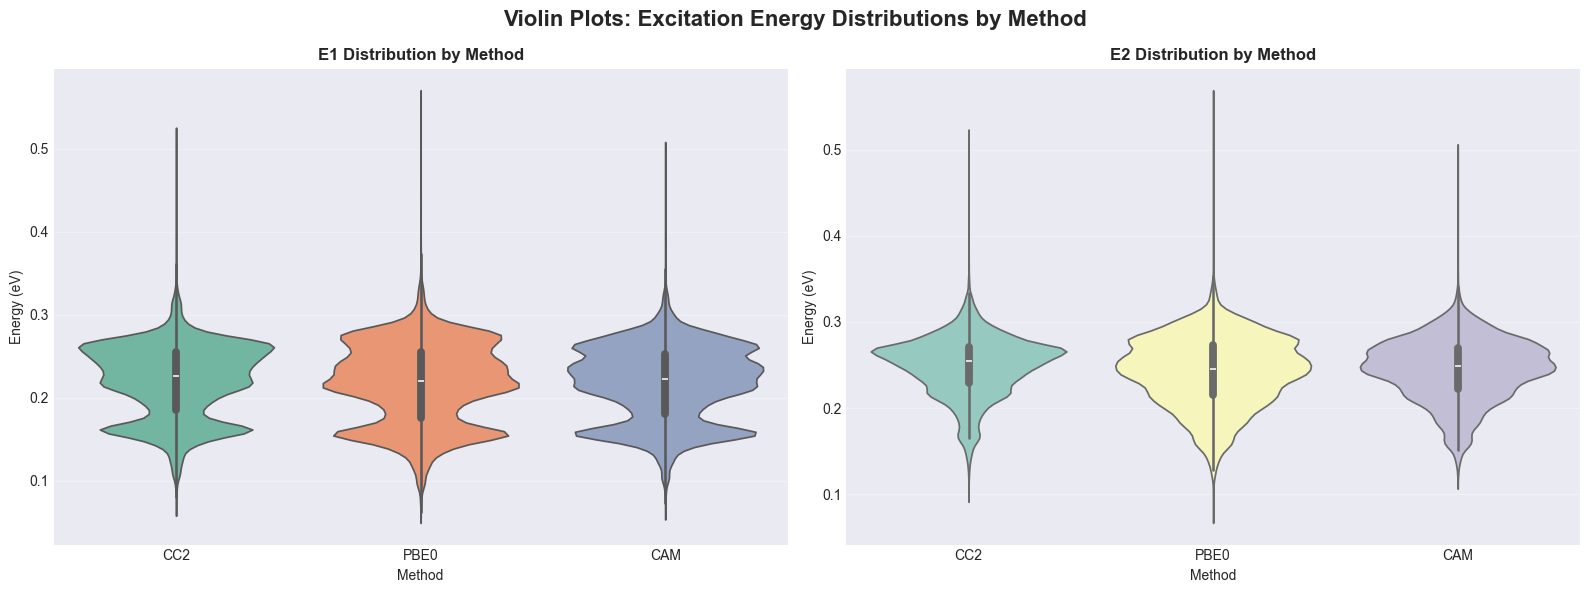

In [24]:
# Visualization 6: Violin plots for E1 and E2 across methods
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Violin Plots: Excitation Energy Distributions by Method', fontsize=16, fontweight='bold')

# Prepare data
e1_df = pd.DataFrame({
    'CC2': df['E1-CC2'].dropna() if 'E1-CC2' in df.columns else [],
    'PBE0': df['E1-PBE0'].dropna() if 'E1-PBE0' in df.columns else [],
    'CAM': df['E1-CAM'].dropna() if 'E1-CAM' in df.columns else []
})
e1_df_melted = e1_df.melt(var_name='Method', value_name='Energy')

e2_df = pd.DataFrame({
    'CC2': df['E2-CC2'].dropna() if 'E2-CC2' in df.columns else [],
    'PBE0': df['E2-PBE0'].dropna() if 'E2-PBE0' in df.columns else [],
    'CAM': df['E2-CAM'].dropna() if 'E2-CAM' in df.columns else []
})
e2_df_melted = e2_df.melt(var_name='Method', value_name='Energy')

# E1 violin plot
sns.violinplot(data=e1_df_melted, x='Method', y='Energy', ax=axes[0], palette='Set2')
axes[0].set_title('E1 Distribution by Method', fontweight='bold')
axes[0].set_ylabel('Energy (eV)')
axes[0].grid(True, alpha=0.3, axis='y')

# E2 violin plot
sns.violinplot(data=e2_df_melted, x='Method', y='Energy', ax=axes[1], palette='Set3')
axes[1].set_title('E2 Distribution by Method', fontweight='bold')
axes[1].set_ylabel('Energy (eV)')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


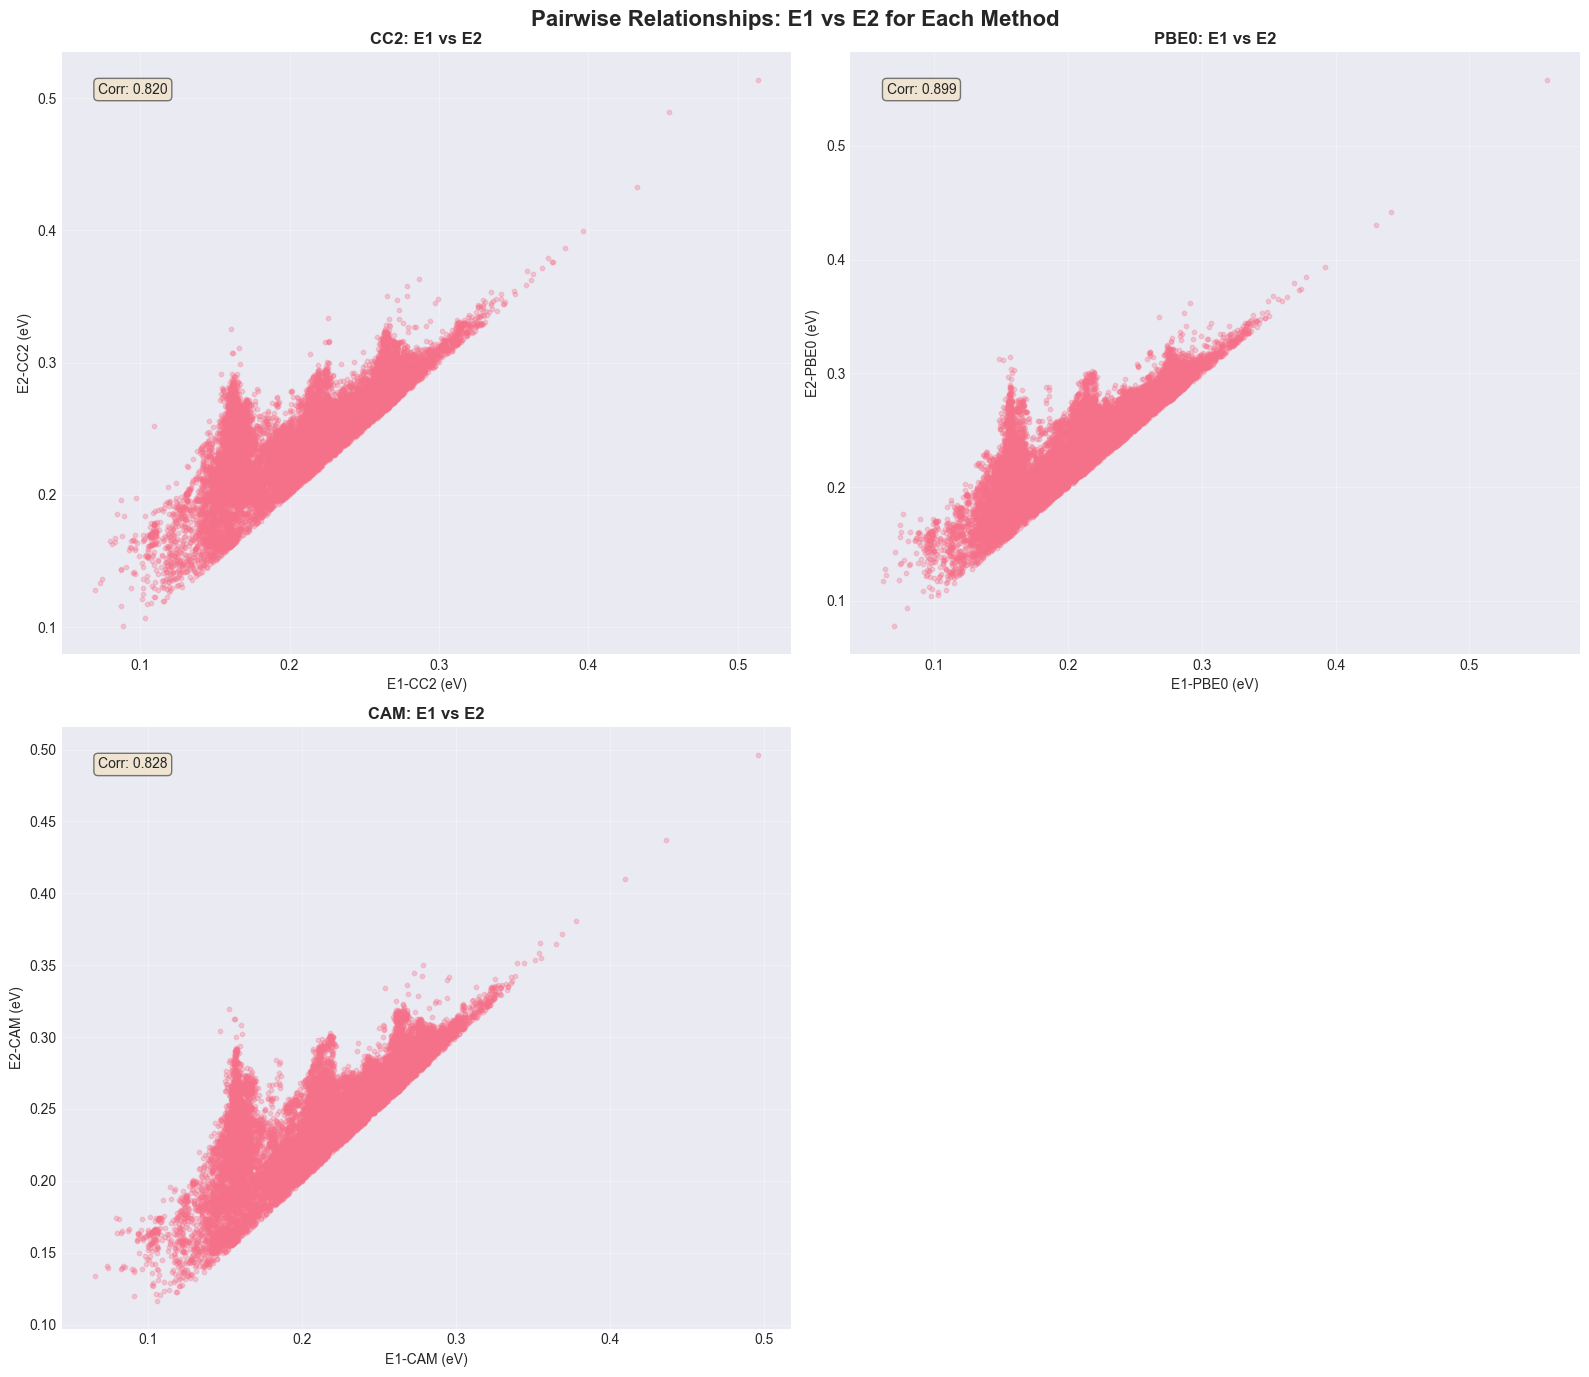

In [25]:
# Visualization 7: Pair plot for E1 and E2 values across methods
e_cols = [col for col in df.columns if col.startswith('E1-') or col.startswith('E2-')]
if len(e_cols) >= 4:
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    fig.suptitle('Pairwise Relationships: E1 vs E2 for Each Method', fontsize=16, fontweight='bold')
    
    methods = ['CC2', 'PBE0', 'CAM']
    positions = [(0, 0), (0, 1), (1, 0)]
    
    for idx, method in enumerate(methods[:3]):
        e1_col = f'E1-{method}'
        e2_col = f'E2-{method}'
        if e1_col in df.columns and e2_col in df.columns:
            row, col = positions[idx]
            axes[row, col].scatter(df[e1_col], df[e2_col], alpha=0.3, s=10)
            axes[row, col].set_xlabel(f'E1-{method} (eV)')
            axes[row, col].set_ylabel(f'E2-{method} (eV)')
            axes[row, col].set_title(f'{method}: E1 vs E2', fontweight='bold')
            axes[row, col].grid(True, alpha=0.3)
            
            # Add correlation coefficient
            corr = df[[e1_col, e2_col]].corr().iloc[0, 1]
            axes[row, col].text(0.05, 0.95, f'Corr: {corr:.3f}', 
                               transform=axes[row, col].transAxes,
                               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Hide the last subplot if not used
    if len(methods) < 4:
        axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()


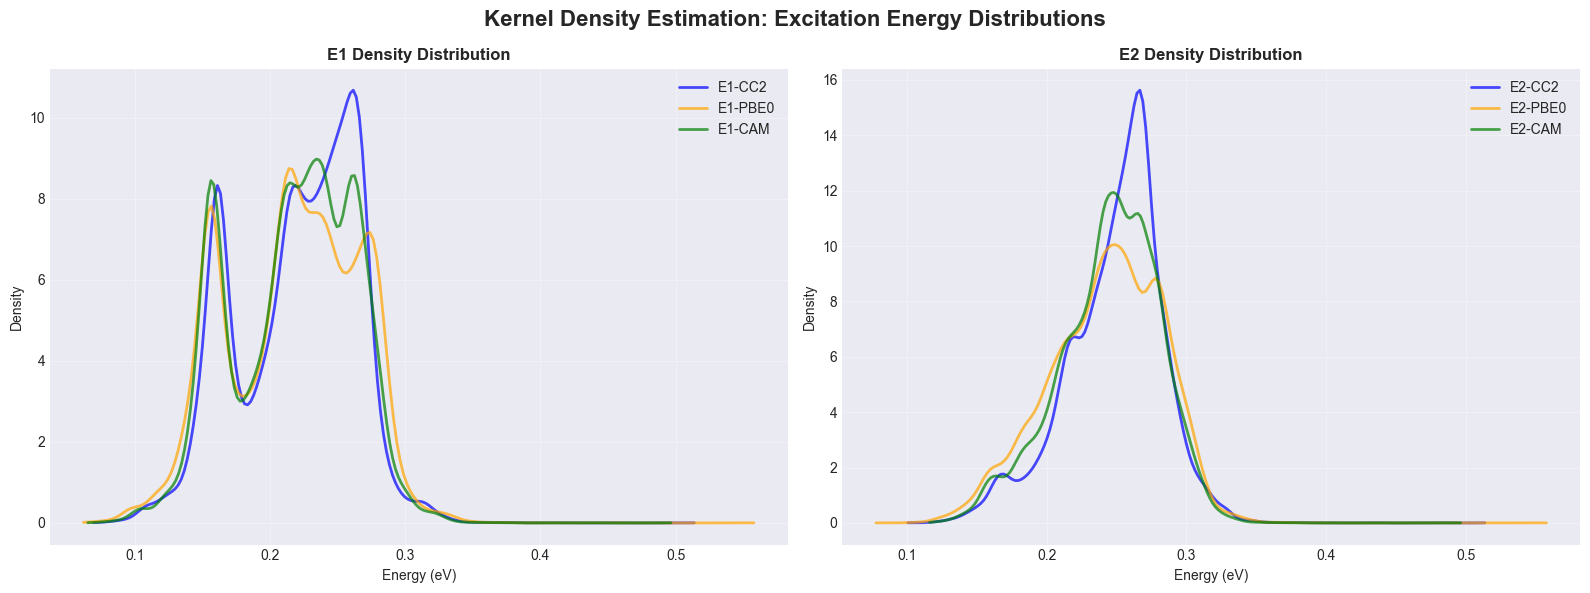

In [26]:
# Visualization 8: Density plots (KDE) for E1 and E2
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Kernel Density Estimation: Excitation Energy Distributions', fontsize=16, fontweight='bold')

methods = ['CC2', 'PBE0', 'CAM']
colors = ['blue', 'orange', 'green']

# E1 KDE
for method, color in zip(methods, colors):
    col = f'E1-{method}'
    if col in df.columns:
        data = df[col].dropna()
        kde = stats.gaussian_kde(data)
        x_range = np.linspace(data.min(), data.max(), 200)
        axes[0].plot(x_range, kde(x_range), label=f'E1-{method}', 
                    linewidth=2, alpha=0.7, color=color)
axes[0].set_xlabel('Energy (eV)')
axes[0].set_ylabel('Density')
axes[0].set_title('E1 Density Distribution', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# E2 KDE
for method, color in zip(methods, colors):
    col = f'E2-{method}'
    if col in df.columns:
        data = df[col].dropna()
        kde = stats.gaussian_kde(data)
        x_range = np.linspace(data.min(), data.max(), 200)
        axes[1].plot(x_range, kde(x_range), label=f'E2-{method}', 
                    linewidth=2, alpha=0.7, color=color)
axes[1].set_xlabel('Energy (eV)')
axes[1].set_ylabel('Density')
axes[1].set_title('E2 Density Distribution', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


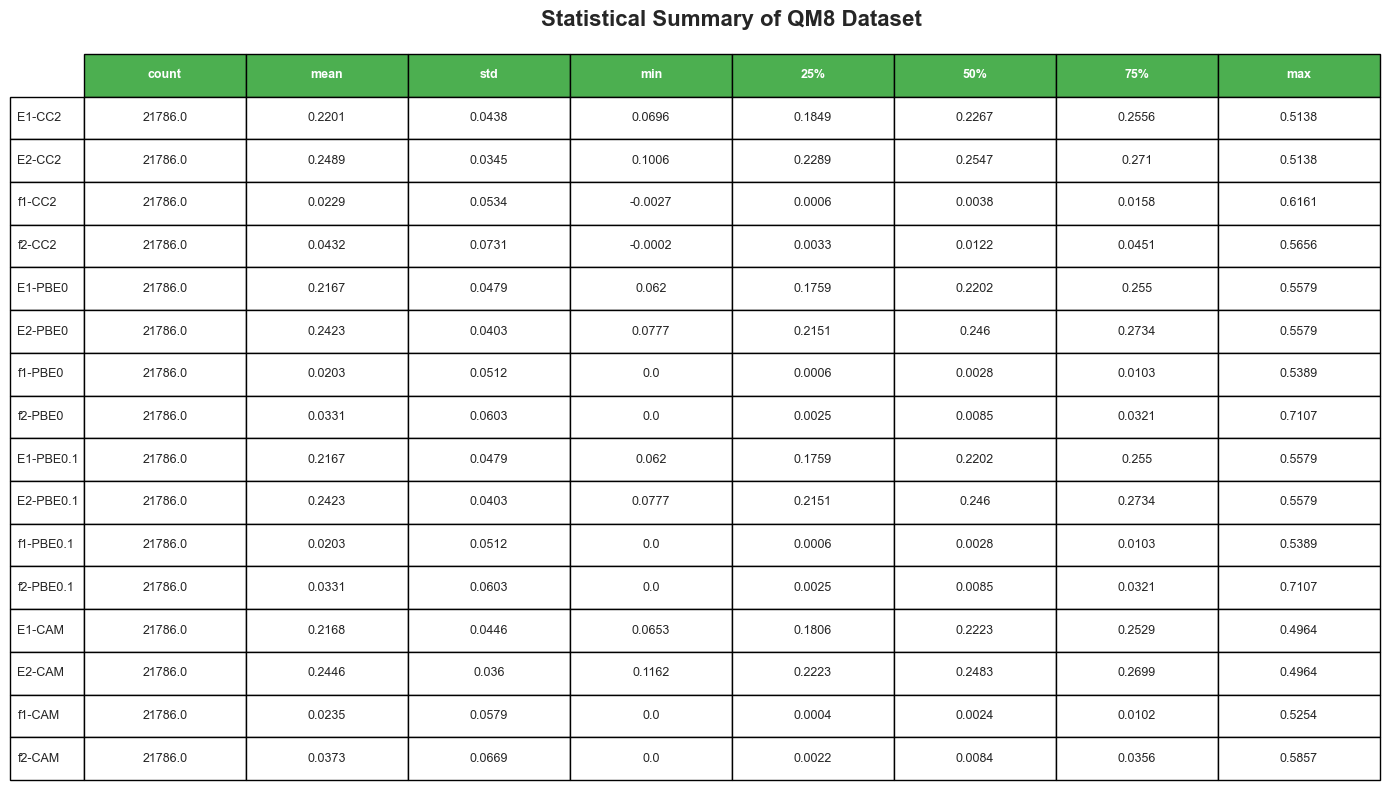

In [27]:
# Visualization 9: Statistical Summary Table
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('tight')
ax.axis('off')

# Select key columns for summary
summary_cols = [col for col in df.columns if any(x in col for x in ['E1-', 'E2-', 'f1-', 'f2-'])]
summary_data = df[summary_cols].describe().T.round(4)

table = ax.table(cellText=summary_data.values,
                rowLabels=summary_data.index,
                colLabels=summary_data.columns,
                cellLoc='center',
                loc='center',
                bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Color header row
for i in range(len(summary_data.columns)):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

plt.title('Statistical Summary of QM8 Dataset', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


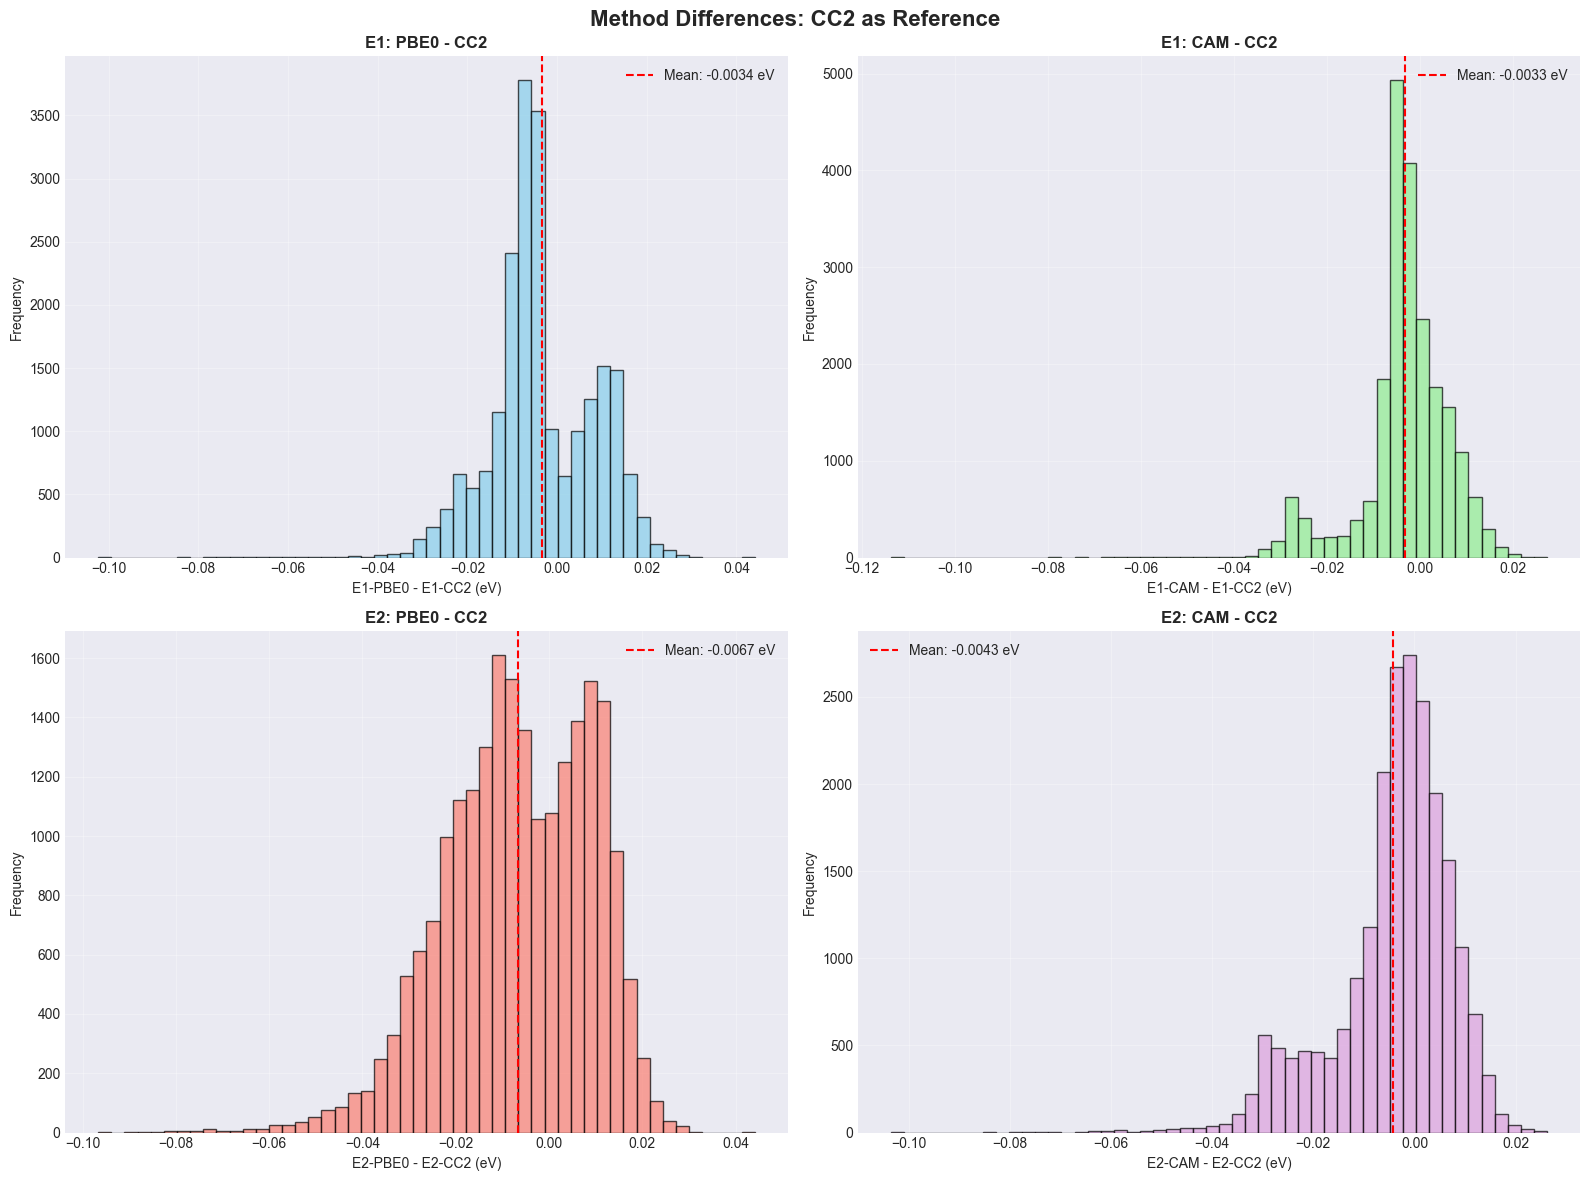

In [28]:
# Visualization 10: Difference plots (Method differences)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Method Differences: CC2 as Reference', fontsize=16, fontweight='bold')

# E1 differences
if 'E1-CC2' in df.columns and 'E1-PBE0' in df.columns:
    diff_e1_pbe0 = df['E1-PBE0'] - df['E1-CC2']
    axes[0, 0].hist(diff_e1_pbe0.dropna(), bins=50, alpha=0.7, edgecolor='black', color='skyblue')
    axes[0, 0].axvline(diff_e1_pbe0.mean(), color='red', linestyle='--', 
                      label=f'Mean: {diff_e1_pbe0.mean():.4f} eV')
    axes[0, 0].set_xlabel('E1-PBE0 - E1-CC2 (eV)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('E1: PBE0 - CC2', fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

if 'E1-CC2' in df.columns and 'E1-CAM' in df.columns:
    diff_e1_cam = df['E1-CAM'] - df['E1-CC2']
    axes[0, 1].hist(diff_e1_cam.dropna(), bins=50, alpha=0.7, edgecolor='black', color='lightgreen')
    axes[0, 1].axvline(diff_e1_cam.mean(), color='red', linestyle='--', 
                       label=f'Mean: {diff_e1_cam.mean():.4f} eV')
    axes[0, 1].set_xlabel('E1-CAM - E1-CC2 (eV)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('E1: CAM - CC2', fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

# E2 differences
if 'E2-CC2' in df.columns and 'E2-PBE0' in df.columns:
    diff_e2_pbe0 = df['E2-PBE0'] - df['E2-CC2']
    axes[1, 0].hist(diff_e2_pbe0.dropna(), bins=50, alpha=0.7, edgecolor='black', color='salmon')
    axes[1, 0].axvline(diff_e2_pbe0.mean(), color='red', linestyle='--', 
                      label=f'Mean: {diff_e2_pbe0.mean():.4f} eV')
    axes[1, 0].set_xlabel('E2-PBE0 - E2-CC2 (eV)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('E2: PBE0 - CC2', fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

if 'E2-CC2' in df.columns and 'E2-CAM' in df.columns:
    diff_e2_cam = df['E2-CAM'] - df['E2-CC2']
    axes[1, 1].hist(diff_e2_cam.dropna(), bins=50, alpha=0.7, edgecolor='black', color='plum')
    axes[1, 1].axvline(diff_e2_cam.mean(), color='red', linestyle='--', 
                      label=f'Mean: {diff_e2_cam.mean():.4f} eV')
    axes[1, 1].set_xlabel('E2-CAM - E2-CC2 (eV)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('E2: CAM - CC2', fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


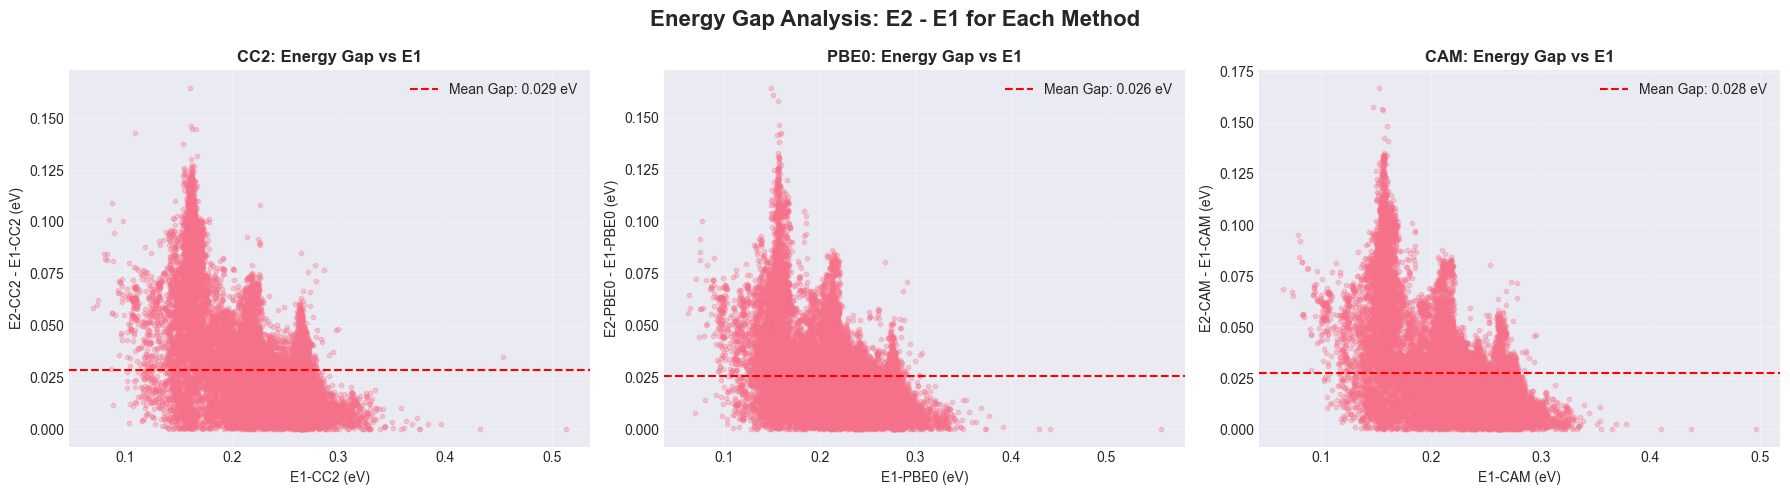

In [29]:
# Visualization 11: Relationship between E1 and E2 (Energy Gap Analysis)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Energy Gap Analysis: E2 - E1 for Each Method', fontsize=16, fontweight='bold')

methods = ['CC2', 'PBE0', 'CAM']
for idx, method in enumerate(methods):
    e1_col = f'E1-{method}'
    e2_col = f'E2-{method}'
    if e1_col in df.columns and e2_col in df.columns:
        energy_gap = df[e2_col] - df[e1_col]
        axes[idx].scatter(df[e1_col], energy_gap, alpha=0.3, s=10)
        axes[idx].set_xlabel(f'E1-{method} (eV)')
        axes[idx].set_ylabel(f'E2-{method} - E1-{method} (eV)')
        axes[idx].set_title(f'{method}: Energy Gap vs E1', fontweight='bold')
        axes[idx].axhline(energy_gap.mean(), color='red', linestyle='--', 
                         label=f'Mean Gap: {energy_gap.mean():.3f} eV')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


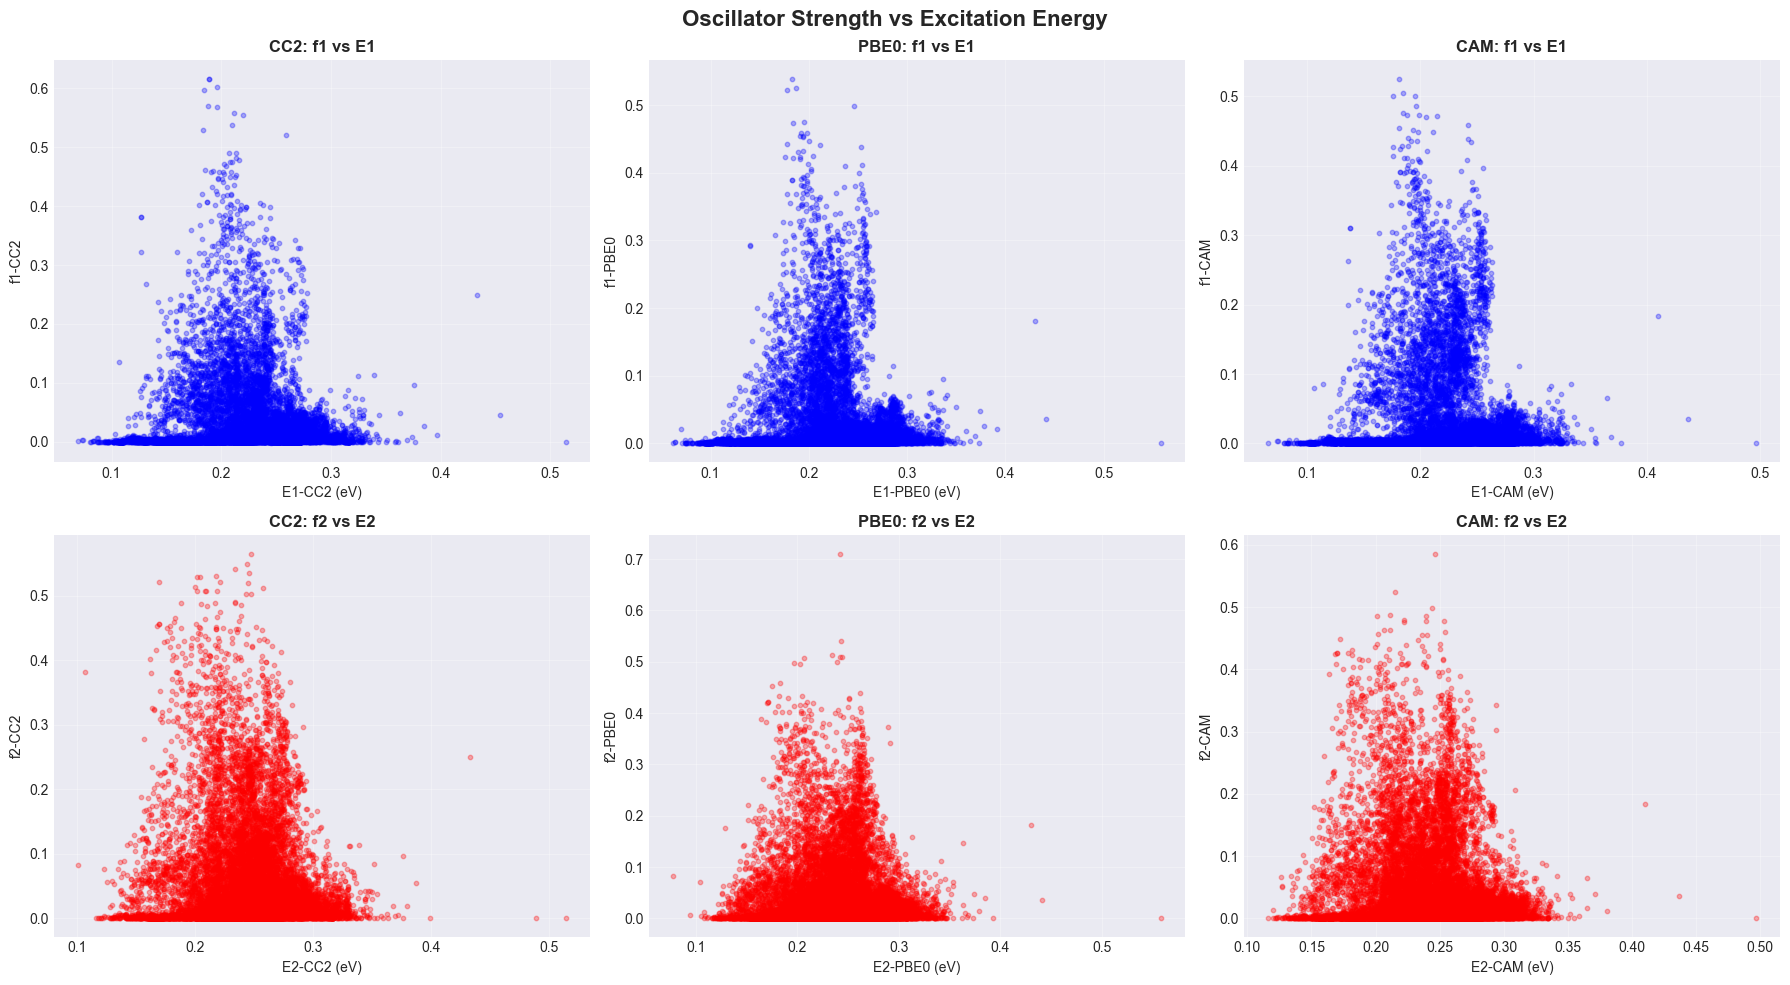

In [30]:
# Visualization 12: Oscillator Strength vs Excitation Energy
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Oscillator Strength vs Excitation Energy', fontsize=16, fontweight='bold')

methods = ['CC2', 'PBE0', 'CAM']
for idx, method in enumerate(methods):
    # f1 vs E1
    e1_col = f'E1-{method}'
    f1_col = f'f1-{method}'
    if e1_col in df.columns and f1_col in df.columns:
        axes[0, idx].scatter(df[e1_col], df[f1_col], alpha=0.3, s=10, color='blue')
        axes[0, idx].set_xlabel(f'E1-{method} (eV)')
        axes[0, idx].set_ylabel(f'f1-{method}')
        axes[0, idx].set_title(f'{method}: f1 vs E1', fontweight='bold')
        axes[0, idx].grid(True, alpha=0.3)
    
    # f2 vs E2
    e2_col = f'E2-{method}'
    f2_col = f'f2-{method}'
    if e2_col in df.columns and f2_col in df.columns:
        axes[1, idx].scatter(df[e2_col], df[f2_col], alpha=0.3, s=10, color='red')
        axes[1, idx].set_xlabel(f'E2-{method} (eV)')
        axes[1, idx].set_ylabel(f'f2-{method}')
        axes[1, idx].set_title(f'{method}: f2 vs E2', fontweight='bold')
        axes[1, idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

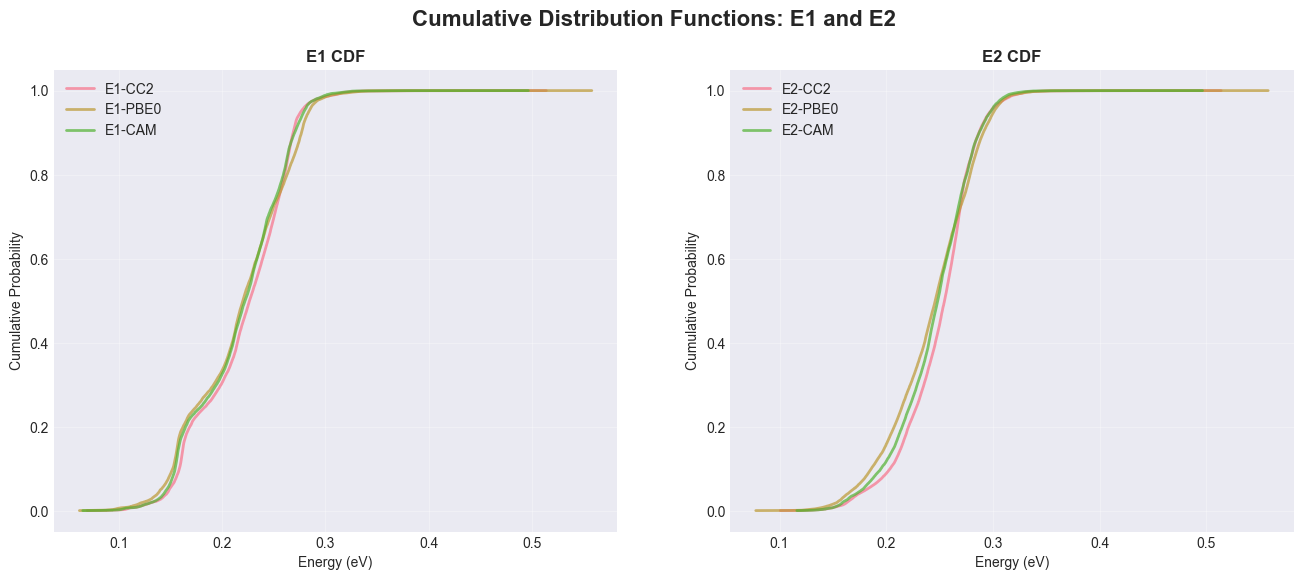

In [31]:
# Visualization 13: Cumulative Distribution Functions (CDF)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Cumulative Distribution Functions: E1 and E2', fontsize=16, fontweight='bold')

methods = ['CC2', 'PBE0', 'CAM']
colors = ['blue', 'orange', 'green']

# E1 CDF
for method, color in zip(methods, colors):
    col = f'E1-{method}'
    if col in df.columns:
        sorted_data = np.sort(df[col].dropna())
        y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        axes[0].plot(sorted_data, y, label=f'E1-{method}', linewidth=2, alpha=0.7)
axes[0].set_xlabel('Energy (eV)')
axes[0].set_ylabel('Cumulative Probability')
axes[0].set_title('E1 CDF', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# E2 CDF
for method, color in zip(methods, colors):
    col = f'E2-{method}'
    if col in df.columns:
        sorted_data = np.sort(df[col].dropna())
        y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        axes[1].plot(sorted_data, y, label=f'E2-{method}', linewidth=2, alpha=0.7)
axes[1].set_xlabel('Energy (eV)')
axes[1].set_ylabel('Cumulative Probability')
axes[1].set_title('E2 CDF', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


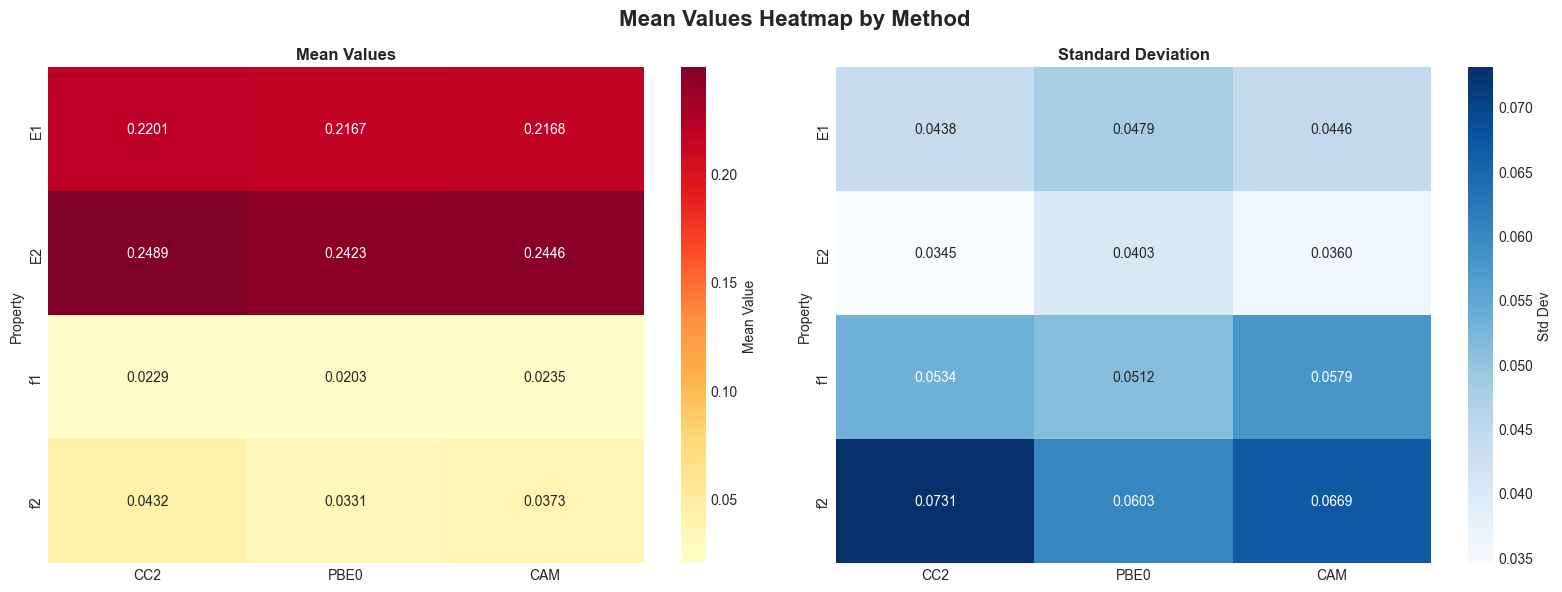

In [ ]:
# Visualization 14: Heatmap of mean values by method
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Mean Values Heatmap by Method', fontsize=16, fontweight='bold')

# Prepare data for heatmap
methods = ['CC2', 'PBE0', 'CAM']
properties = ['E1', 'E2', 'f1', 'f2']

# Mean values heatmap
mean_data = []
for prop in properties:
    row = []
    for method in methods:
        col = f'{prop}-{method}'
        if col in df.columns:
            row.append(df[col].mean())
        else:
            row.append(np.nan)
    mean_data.append(row)

mean_df = pd.DataFrame(mean_data, index=properties, columns=methods)

sns.heatmap(mean_df, annot=True, fmt='.4f', cmap='YlOrRd', ax=axes[0], cbar_kws={'label': 'Mean Value'})
axes[0].set_title('Mean Values', fontweight='bold')
axes[0].set_ylabel('Property')

# Standard deviation heatmap
std_data = []
for prop in properties:
    row = []
    for method in methods:
        col = f'{prop}-{method}'
        if col in df.columns:
            row.append(df[col].std())
        else:
            row.append(np.nan)
    std_data.append(row)

std_df = pd.DataFrame(std_data, index=properties, columns=methods)

sns.heatmap(std_df, annot=True, fmt='.4f', cmap='Blues', ax=axes[1], cbar_kws={'label': 'Std Dev'})
axes[1].set_title('Standard Deviation', fontweight='bold')
axes[1].set_ylabel('Property')

plt.tight_layout()
plt.show()


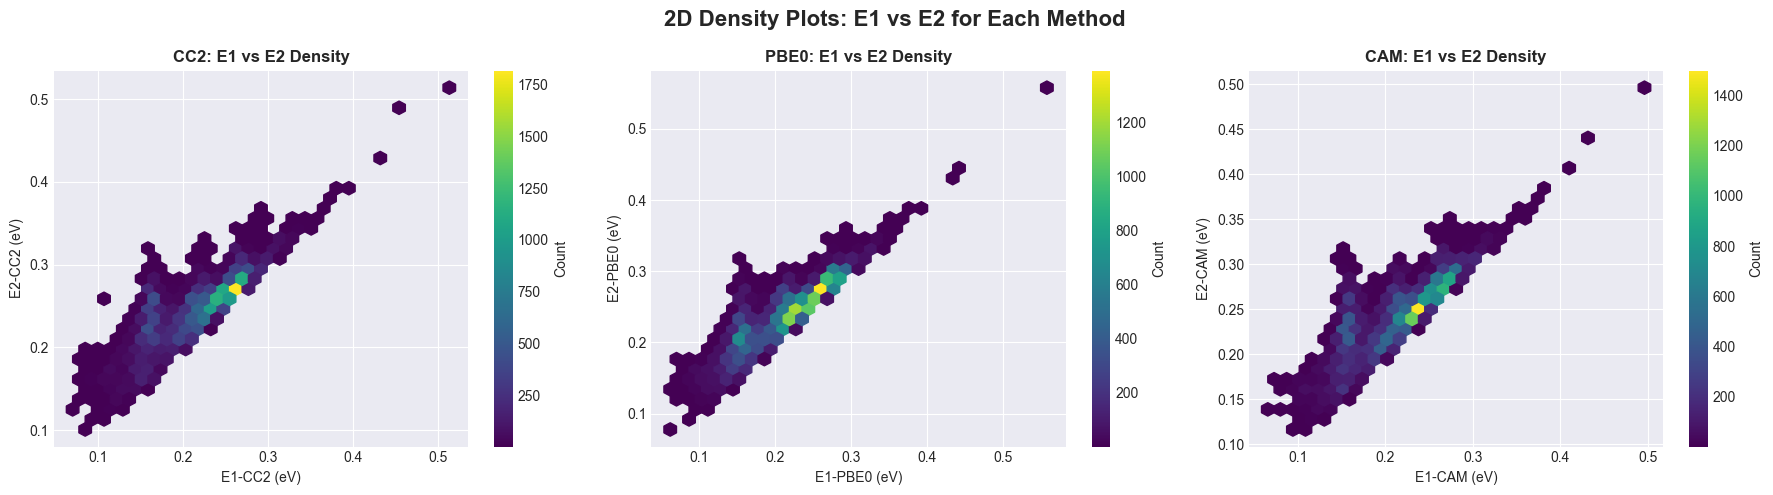

In [ ]:
# Visualization 15: 2D Histogram (Hexbin) for E1 vs E2
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('2D Density Plots: E1 vs E2 for Each Method', fontsize=16, fontweight='bold')

methods = ['CC2', 'PBE0', 'CAM']
for idx, method in enumerate(methods):
    e1_col = f'E1-{method}'
    e2_col = f'E2-{method}'
    if e1_col in df.columns and e2_col in df.columns:
        hb = axes[idx].hexbin(df[e1_col], df[e2_col], gridsize=30, cmap='viridis', mincnt=1)
        axes[idx].set_xlabel(f'E1-{method} (eV)')
        axes[idx].set_ylabel(f'E2-{method} (eV)')
        axes[idx].set_title(f'{method}: E1 vs E2 Density', fontweight='bold')
        plt.colorbar(hb, ax=axes[idx], label='Count')

plt.tight_layout()
plt.show()


In [39]:
# PART 1: IMPORTS AND DEPENDENCIES FOR ML MODEL
# Note: pandas, numpy, matplotlib, seaborn already imported in Cell 0

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# GNN-specific packages
try:
    import torch_geometric
    from torch_geometric.data import Data, Batch
    from torch_geometric.nn import GCNConv, GATConv, MessagePassing
    TORCH_GEOMETRIC_AVAILABLE = True
    print(f'torch_geometric version: {torch_geometric.__version__}')
except ImportError:
    TORCH_GEOMETRIC_AVAILABLE = False
    print('torch_geometric not available. Will use custom graph utilities.')

# ML utilities (not already imported)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seeds for reproducibility (np already imported above)
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
print(f'PyTorch version: {torch.__version__}')

torch_geometric version: 2.6.1
Using device: cpu
PyTorch version: 2.3.1


Computing radiative lifetime (τ₁) from CAM-B3LYP values...
Dataset shape before computation: (20194, 19)

Filtering invalid entries...
Removed 0 invalid entries
Valid entries: 20194

=== Radiative Lifetime Statistics ===
τ₁ (seconds):
  Mean: 2.1851e-11
  Median: 2.7602e-12
  Min: 1.3428e-14
  Max: 5.3787e-10
  Std: 4.5010e-11

log₁₀(τ₁):
  Mean: -11.5417
  Median: -11.5591
  Min: -13.8720
  Max: -9.2693
  Std: 1.0115


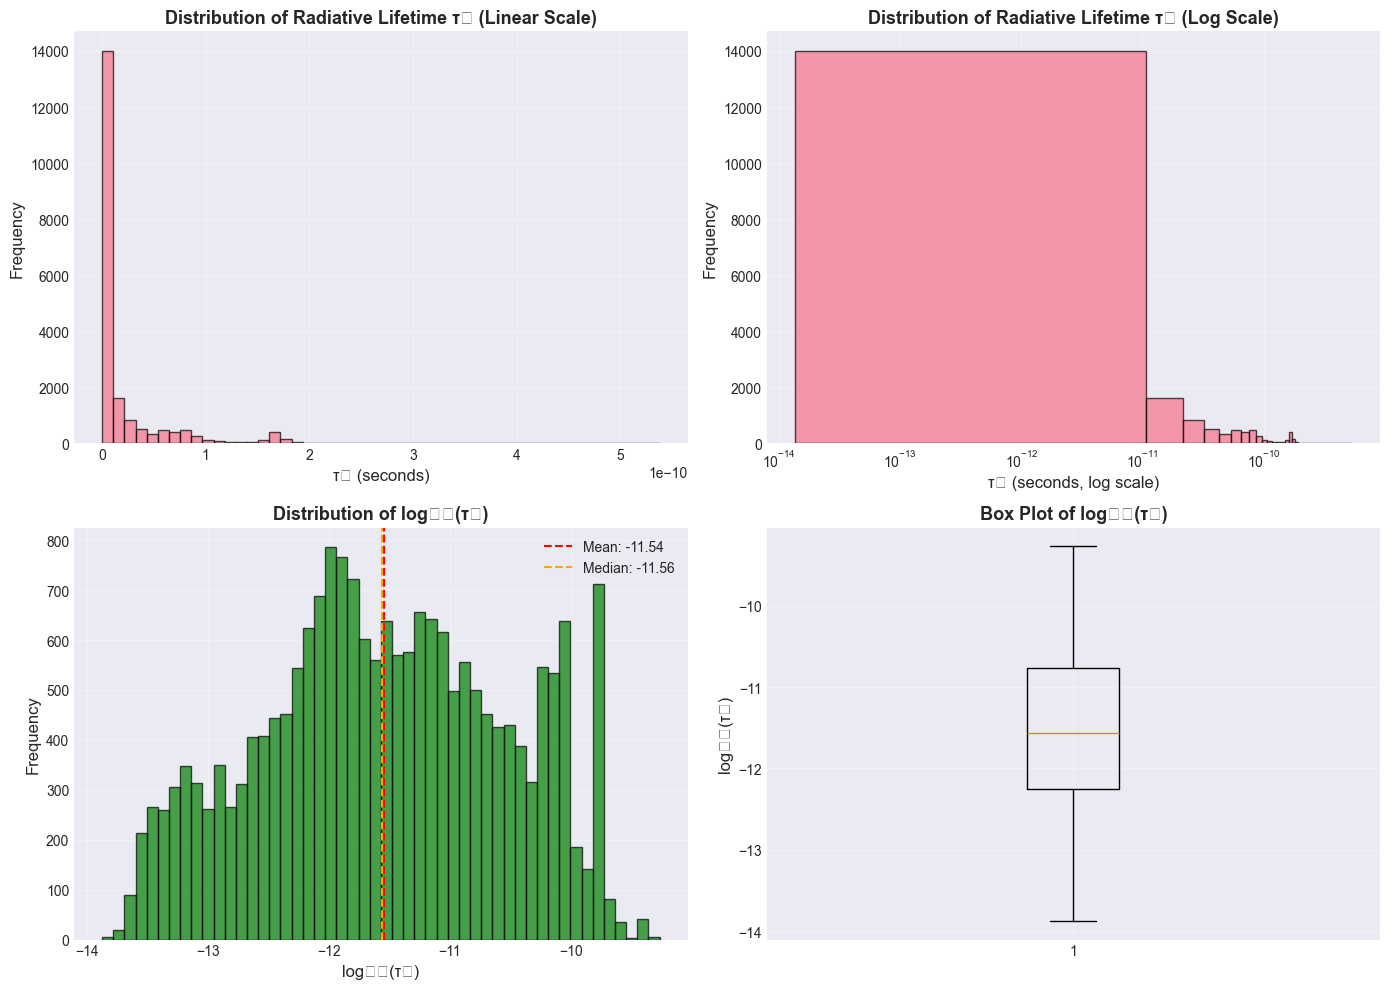


✓ Radiative lifetime computation complete!
Dataframe now contains 'tau_1' and 'log_tau_1' columns


In [40]:
# PART 2: COMPUTE RADIATIVE LIFETIME (τ₁) FROM QUANTUM CHEMISTRY DATA

# Define function to compute radiative lifetime using Einstein A coefficient relation
# τ₁ = C / [f₁ * (E₁)²] where:
# - E₁ is the first excited-state energy (in eV)
# - f₁ is the oscillator strength (dimensionless)
# - C is a physical constant (units: eV²·s)
# 
# For atomic units and SI conversion:
# C ≈ 4.134×10⁻¹⁶ s·eV² (approximate constant for the Einstein A coefficient)
# However, we'll use a normalized constant for numerical stability

def compute_radiative_lifetime(E1, f1, constant=4.134e-16):
    """
    Compute radiative lifetime τ₁ using quantum electrodynamics relation.
    
    Parameters:
    -----------
    E1 : float or array
        First excited-state energy (eV)
    f1 : float or array
        Oscillator strength (dimensionless)
    constant : float
        Physical constant for unit conversion (default: 4.134e-16 s·eV²)
    
    Returns:
    --------
    tau_1 : float or array
        Radiative lifetime in seconds
    """
    # Handle zero/negative values
    with np.errstate(divide='ignore', invalid='ignore'):
        denominator = f1 * (E1 ** 2)
        tau_1 = np.where(denominator > 0, constant / denominator, np.nan)
    return tau_1

# Compute tau_1 using CAM-B3LYP values (E1-CAM and f1-CAM)
print("Computing radiative lifetime (τ₁) from CAM-B3LYP values...")
print(f"Dataset shape before computation: {df.shape}")

# Compute tau_1
df['tau_1'] = compute_radiative_lifetime(df['E1-CAM'], df['f1-CAM'])

# Filter invalid entries
print("\nFiltering invalid entries...")
initial_count = len(df)
df = df[(df['f1-CAM'] > 0) & (df['E1-CAM'] > 0) & (df['tau_1'] > 0) & (df['tau_1'].notna())]
valid_count = len(df)
print(f"Removed {initial_count - valid_count} invalid entries")
print(f"Valid entries: {valid_count}")

# Compute log(τ₁) for better numerical stability and normalization
df['log_tau_1'] = np.log10(df['tau_1'])

# Statistics
print("\n=== Radiative Lifetime Statistics ===")
print(f"τ₁ (seconds):")
print(f"  Mean: {df['tau_1'].mean():.4e}")
print(f"  Median: {df['tau_1'].median():.4e}")
print(f"  Min: {df['tau_1'].min():.4e}")
print(f"  Max: {df['tau_1'].max():.4e}")
print(f"  Std: {df['tau_1'].std():.4e}")

print(f"\nlog₁₀(τ₁):")
print(f"  Mean: {df['log_tau_1'].mean():.4f}")
print(f"  Median: {df['log_tau_1'].median():.4f}")
print(f"  Min: {df['log_tau_1'].min():.4f}")
print(f"  Max: {df['log_tau_1'].max():.4f}")
print(f"  Std: {df['log_tau_1'].std():.4f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of τ₁ (linear scale)
axes[0, 0].hist(df['tau_1'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('τ₁ (seconds)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Radiative Lifetime τ₁ (Linear Scale)', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Distribution of τ₁ (log scale)
axes[0, 1].hist(df['tau_1'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_xscale('log')
axes[0, 1].set_xlabel('τ₁ (seconds, log scale)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Distribution of Radiative Lifetime τ₁ (Log Scale)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Distribution of log(τ₁)
axes[1, 0].hist(df['log_tau_1'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_xlabel('log₁₀(τ₁)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Distribution of log₁₀(τ₁)', fontsize=13, fontweight='bold')
axes[1, 0].axvline(df['log_tau_1'].mean(), color='red', linestyle='--', label=f'Mean: {df["log_tau_1"].mean():.2f}')
axes[1, 0].axvline(df['log_tau_1'].median(), color='orange', linestyle='--', label=f'Median: {df["log_tau_1"].median():.2f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Box plot of log(τ₁)
axes[1, 1].boxplot(df['log_tau_1'], vert=True)
axes[1, 1].set_ylabel('log₁₀(τ₁)', fontsize=12)
axes[1, 1].set_title('Box Plot of log₁₀(τ₁)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Radiative lifetime computation complete!")
print(f"Dataframe now contains 'tau_1' and 'log_tau_1' columns")